# Wild Blueberry Yield Prediction and Variable Importance Visualization using Random Forests

## About Data
Copyright (c) 2020 Saurabh Shahane  
 (Licensed under CC BY 4.0）https://creativecommons.org/licenses/by/4.0/  
  
[Wild Blueberry Yield Prediction(kaggle)](https://www.kaggle.com/datasets/saurabhshahane/wild-blueberry-yield-prediction)

## About Code
This code aims to estimate the wild blueberry yield from their measurements using Random Forest.    
Also, In this code visualizes the importance of variables.

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import zip_longest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.inspection import permutation_importance
from sklearn.inspection import partial_dependence
import shap
import warnings

In [3]:
warnings.simplefilter('ignore')

In [4]:
%matplotlib inline
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.minor.visible'] = False
plt.rcParams['ytick.minor.visible'] = False

In [6]:
df = pd.read_csv('../Data/WildBlueberryPollinationSimulationData.csv')
df.drop('Row#', axis=1,inplace=True)
df

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,16.00,0.26,0.410652,0.408159,31.678898,3813.165795
1,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,1.00,0.10,0.444254,0.425458,33.449385,4947.605663
2,37.5,0.750,0.250,0.250,0.250,94.6,57.2,79.0,68.2,33.0,55.9,16.00,0.26,0.383787,0.399172,30.546306,3866.798965
3,37.5,0.750,0.250,0.250,0.250,94.6,57.2,79.0,68.2,33.0,55.9,1.00,0.10,0.407564,0.408789,31.562586,4303.943030
4,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39,0.354413,0.382703,28.873714,3436.493543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,10.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.486815,0.428012,33.447471,5333.873335
773,40.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.342841,0.377915,28.462005,3373.436842
774,20.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39,0.404617,0.401670,30.748240,4203.027624
775,20.0,0.537,0.117,0.409,0.058,89.0,39.0,65.6,66.0,28.0,45.3,3.77,0.06,0.401538,0.399935,30.582161,4166.299735


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clonesize             777 non-null    float64
 1   honeybee              777 non-null    float64
 2   bumbles               777 non-null    float64
 3   andrena               777 non-null    float64
 4   osmia                 777 non-null    float64
 5   MaxOfUpperTRange      777 non-null    float64
 6   MinOfUpperTRange      777 non-null    float64
 7   AverageOfUpperTRange  777 non-null    float64
 8   MaxOfLowerTRange      777 non-null    float64
 9   MinOfLowerTRange      777 non-null    float64
 10  AverageOfLowerTRange  777 non-null    float64
 11  RainingDays           777 non-null    float64
 12  AverageRainingDays    777 non-null    float64
 13  fruitset              777 non-null    float64
 14  fruitmass             777 non-null    float64
 15  seeds                 7

### Investigating Missing Values

In [8]:
print('Is there any NaN value in the dataset: ', df.isnull().values.any())

Is there any NaN value in the dataset:  False


### Correlation of the Variables

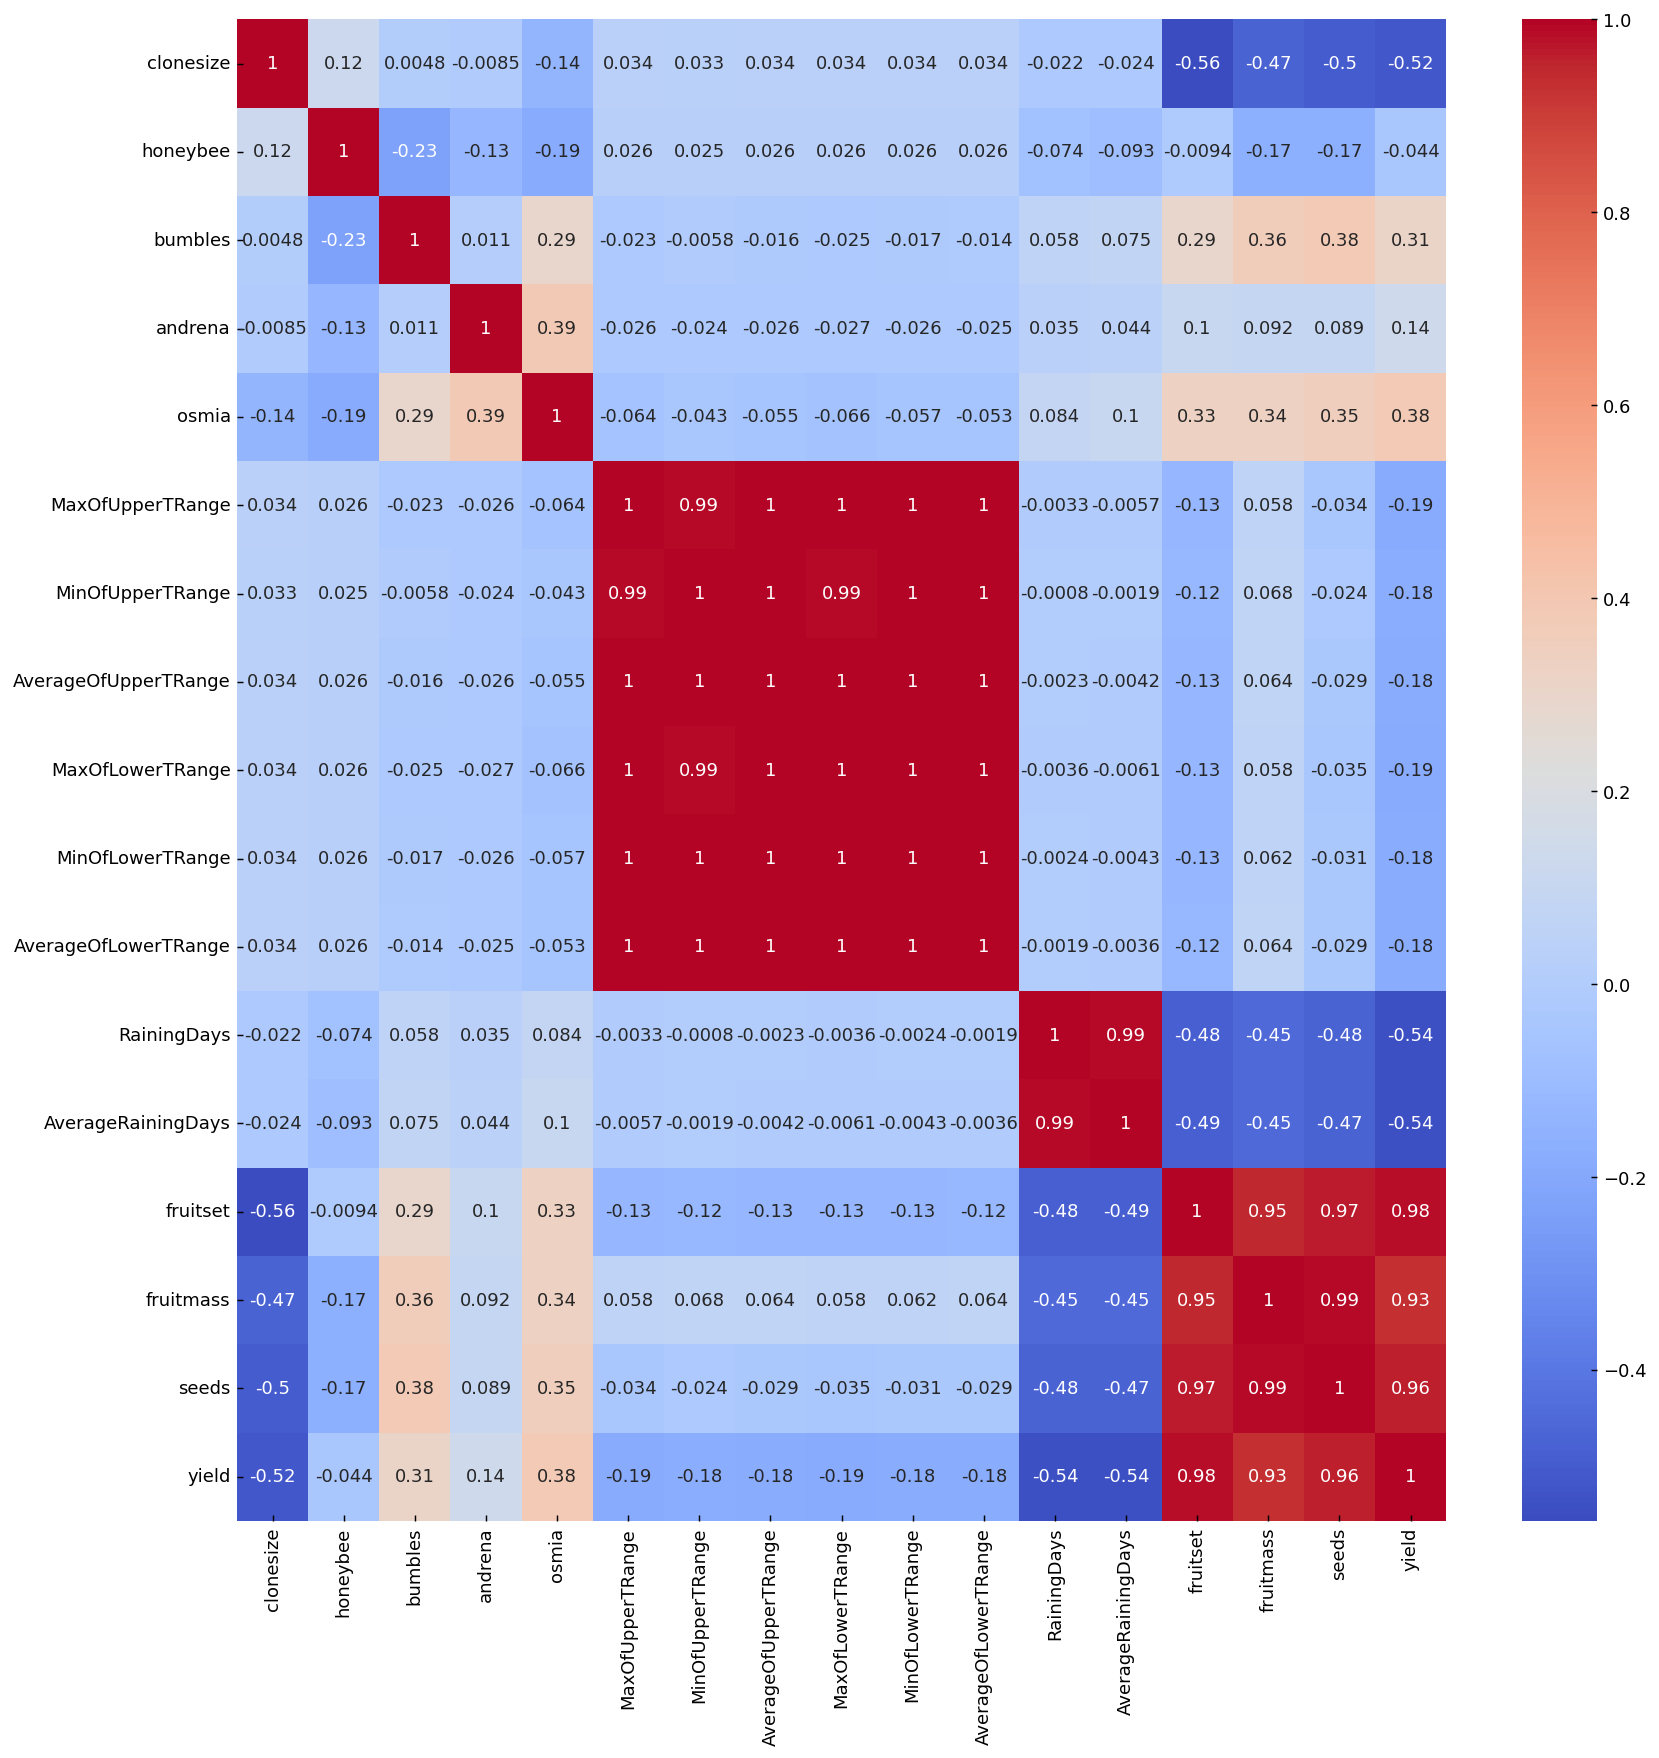

In [13]:
fig, ax = plt.subplots(figsize=(15,15),dpi=130)
sns.heatmap(df.corr(), ax=ax, annot=True, cmap='coolwarm')
fig.show()

### Preparing the Random Forest modeling

In [15]:
X = df.drop('yield', axis=1)
y = df['yield']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=314)

In [17]:
forest = RandomForestRegressor()

### Predictions

In [18]:
forest.fit(X_train, y_train)

RandomForestRegressor()

In [19]:
y_test_pred = forest.predict(X_test)

### Analysing the results of the Model from Train Dataset and Predictions

In [20]:
print('R2 : ', r2_score(y_test, y_test_pred))
print('MAE : ',mean_absolute_error(y_test, y_test_pred))
print('RMSE : ',np.sqrt(mean_squared_error(y_test, y_test_pred)))

R2 :  0.9827613650089589
MAE :  128.70683763403827
RMSE :  180.763530697235


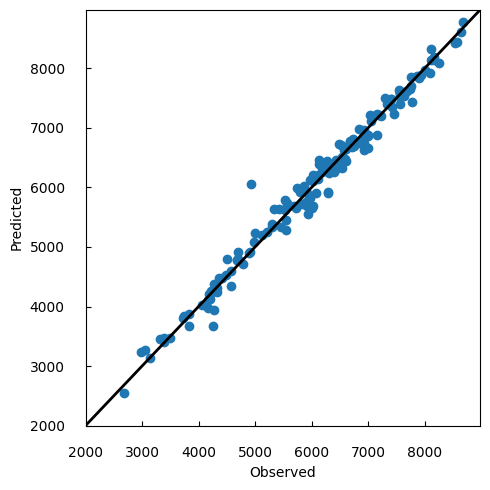

In [22]:
disp_min = 2000
disp_max = y.max() + 10
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(y_test, y_test_pred)
ax.plot([disp_min, disp_max], [disp_min, disp_max], color='black', linewidth=2.0)
ax.set_xlim(disp_min, disp_max)
ax.set_ylim(disp_min, disp_max)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')
ax.tick_params(pad=15)
fig.tight_layout()
fig.show()

### Variable Importance Visualization

#### Permutation Feature Importance

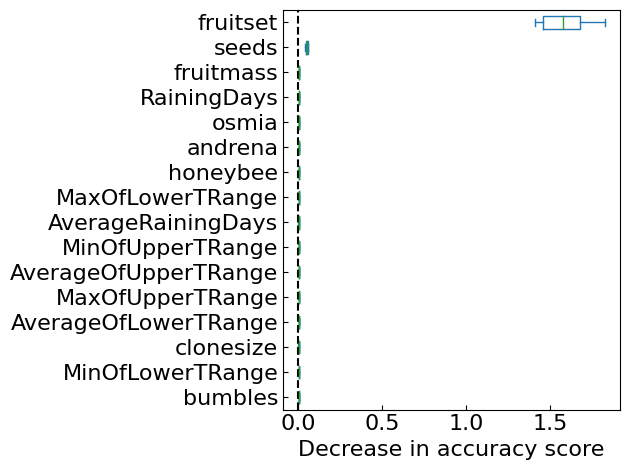

In [23]:
result = permutation_importance(forest, X_test, y_test, n_repeats=10, random_state=314)
sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(result.importances[sorted_importances_idx].T,
                        columns=X_test.columns[sorted_importances_idx],)
ax = importances.plot.box(vert=False, whis=10,fontsize=16)
ax.axvline(x=0, color='k', linestyle='--')
ax.set_xlabel('Decrease in accuracy score',fontsize=16)
ax.figure.tight_layout()
plt.show()
plt.clf()
plt.close()

#### Partial Dependence (PD) and Individual Conditional Expectation (ICE)

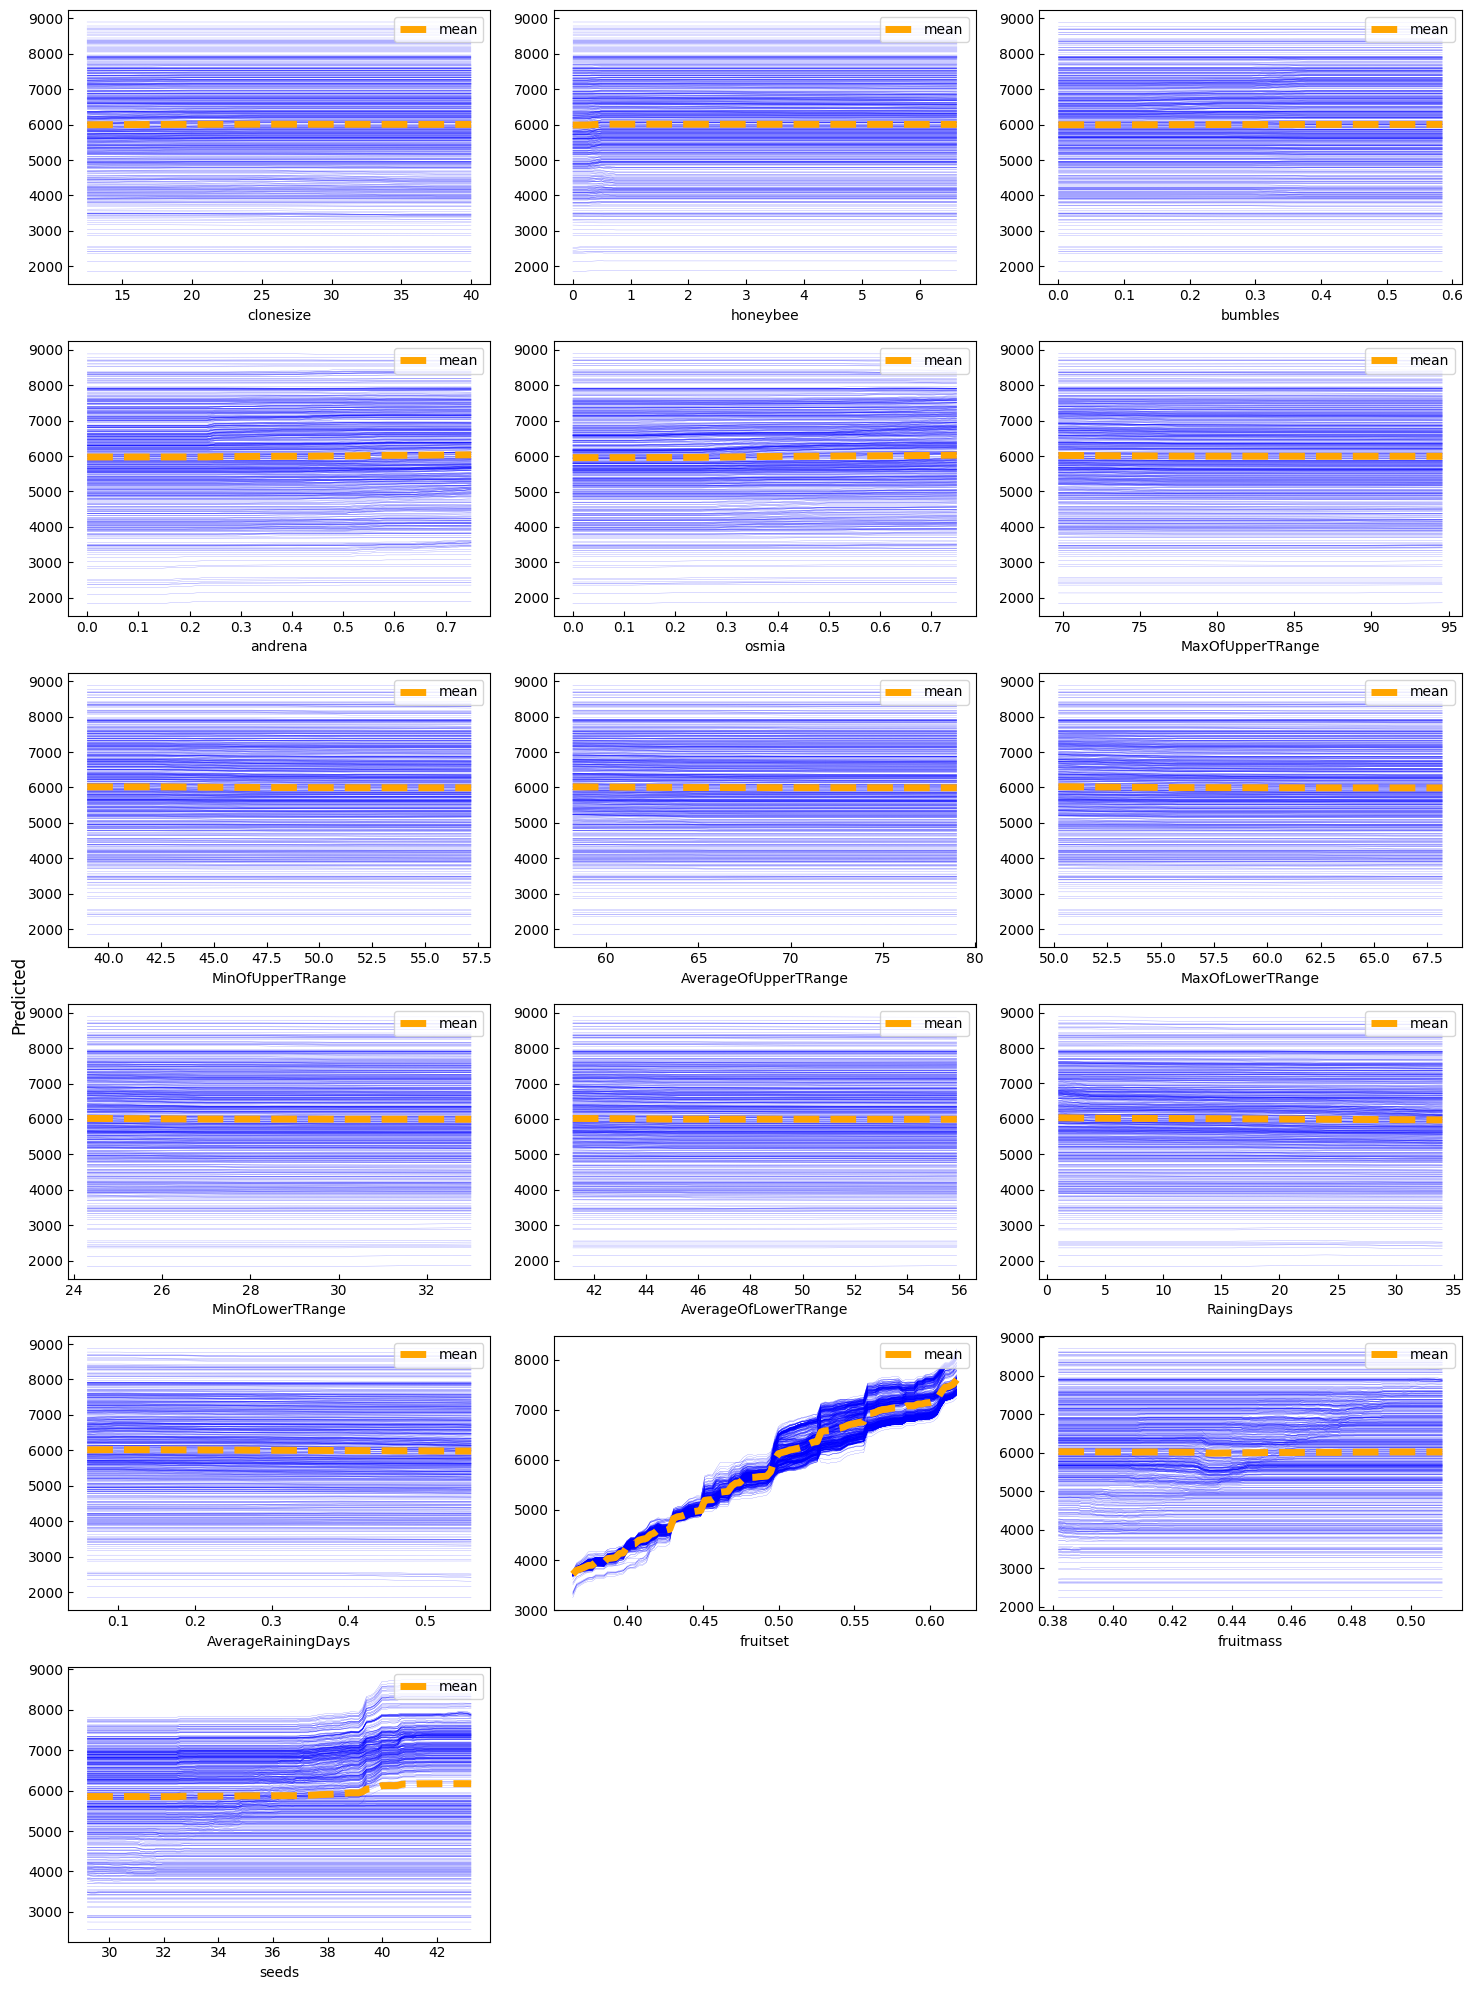

In [52]:
num_column = 3
num_row = int(len(X_train.columns) / num_column) + 1
column_data = list(X_train.columns)

fig, axes = plt.subplots(num_row, num_column, figsize=(15, 20))
for column, ax in zip_longest(column_data, axes.ravel()):
    if column is None:
        ax.axis('off')
        continue
    
    pd_and_ice = partial_dependence(forest, features=[column], percentiles=(0.05, 1-0.05), X=X_train, kind='individual')
    feature_grid = pd_and_ice['values'][0]
    pd_mean = pd_and_ice['individual'][0,:,:].mean(axis=0)
    pd_ind = np.squeeze(np.squeeze(pd_and_ice['individual']))
    
    for i in range(len(pd_ind)):
        ax.plot(feature_grid, pd_ind[i], color='blue', linewidth=0.1)
    ax.plot(feature_grid, pd_mean, label='mean', color='orange', linestyle = 'dashed', linewidth=5)
    ax.set_xlabel(column)
    ax.legend(loc='upper right') 

fig.supylabel('Predicted')      
fig.tight_layout()
fig.show()

#### SHapley Additive exPlanations (SHAP)

In [53]:
explainer = shap.Explainer(forest, X_test)
shap_values = explainer(X_test,check_additivity=False)

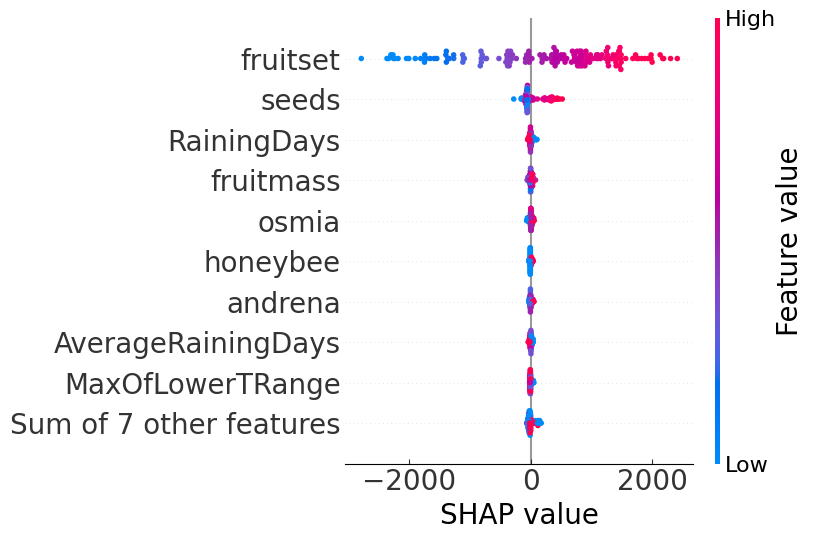

In [54]:
fig, ax = plt.gcf(), plt.gca()
shap.plots.beeswarm(shap_values, max_display=10, show=False)
ax.tick_params(labelsize=20)
ax.set_xlabel('SHAP value', fontsize=20)
cb_ax = fig.axes[1]
cb_ax.tick_params(labelsize=16)
cb_ax.set_ylabel('Feature value', fontsize=20)
fig.tight_layout()
fig.show()

## Summary
The code predicted the yield of the wild blueberry in a random forest.  
It also visualized the variables' importance to clarify the model's behavior.    
The results showed that the fruitset of the wild blueberry was important.  
If you find this code helpful, I would appreciate a star.  
Thank you for taking the time to look at this to the end.  